<a href="https://colab.research.google.com/github/sharadnatarajSJSU/Deep-Neural-Networks/blob/main/Regression_California_housing_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
import keras

In [11]:
from tensorflow.keras.optimizers import SGD

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [24]:
X_train_full

array([[   4.2143    ,   37.        ,    5.28823529, ...,    2.52941176,
          33.81      , -118.12      ],
       [   5.3468    ,   42.        ,    6.36432161, ...,    2.40452261,
          37.16      , -121.98      ],
       [   3.9191    ,   36.        ,    6.11006289, ...,    2.23584906,
          38.45      , -122.69      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [25]:
y_train_full

array([2.285, 2.799, 1.83 , ..., 2.221, 2.835, 3.25 ])

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [34]:
keras.backend.clear_session()
model.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3880 - val_loss: 0.3662
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3868 - val_loss: 0.3898
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3862 - val_loss: 0.3660
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3850 - val_loss: 0.3643
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3843 - val_loss: 0.3643
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3833 - val_loss: 0.3737
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3828 - val_loss: 0.3618
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3818 - val_loss: 0.3611
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3810 - val_loss: 0.3610
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3802 - val_loss: 0.3674

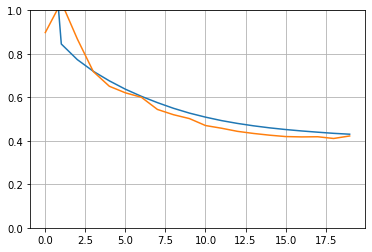

In [20]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
y_pred

array([[0.6525459],
       [1.8628502],
       [3.6536775]], dtype=float32)